# EXPLORATORY DATA ANALYSIS  ON MINING GEOCHEMICAL DATA SAMPLE COLLECTION ACROSS THREE GOLD EXPLORATION PROJECTS

 In the initial stages of a major mining project, as an exploration geologist, it is necessary to collect geochemical samples from different areas of interest, such as rocks, soil, stream, and auger samples. These samples are collected over a wide geographical area, often several kilometers, which can be sub-zoned into smaller regions to facilitate management.

 Once collected, the samples undergo a rigorous quality assurance and quality control process to ensure the accuracy of the results. They are then taken to the laboratory for analysis, with a focus on identifying the presence and distribution of gold or other desirable metals.

 To gain insights into the data, exploratory analysis is conducted on the dataset. This analysis helps to understand the variations in the concentration of gold across different regions and sample types. The goal is to use this information to identify areas that may have high concentrations of gold and to optimize exploration efforts to maximize the chances of discovering economically viable deposits.






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [2]:
df = pd.read_csv('Segilola_Assay_Geochem 3.csv')

In [3]:
df.head()

Sample_Type Project Sampled_Date Sample_Id     X_UTM     Y_UTM  Z_UTM  \
0       Auger    East     1/9/2020   SAS0025  701894.0  831529.0  350.0   
1       Auger    East     1/9/2020   SAS0026  701921.0  831531.0  355.0   
2       Auger    East     1/9/2020   SAS0027  701945.0  831528.0  358.0   
3       Auger    East     1/9/2020   SAS0028  701971.0  831531.0  358.0   
4       Auger    East     1/9/2020   SAS0029  701995.0  831532.0  358.0   

   Depth Tenement  Lab_Turnaround  Weight  Au_ppm  
0   0.60  EL19066            24.0    1.90   0.033  
1   0.60  EL19066            24.0    1.84   0.102  
2   0.60  EL19066            24.0    1.26   0.003  
3   0.85  EL19066            24.0    1.11   0.003  
4   0.70  EL19066            24.0    0.99   0.003

In [4]:
df_copy = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386 entries, 0 to 24385
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sample_Type     24386 non-null  object 
 1   Project         24386 non-null  object 
 2   Sampled_Date    24386 non-null  object 
 3   Sample_Id       24386 non-null  object 
 4   X_UTM           24386 non-null  float64
 5   Y_UTM           24386 non-null  float64
 6   Z_UTM           24360 non-null  float64
 7   Depth           22473 non-null  float64
 8   Tenement        24386 non-null  object 
 9   Lab_Turnaround  15094 non-null  float64
 10  Weight          23618 non-null  float64
 11  Au_ppm          24386 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.2+ MB


In [6]:
df.duplicated().sum()  #Checking for duplicates

0

In [7]:
df.isnull().sum()    #Checking for empty cells

Sample_Type          0
Project              0
Sampled_Date         0
Sample_Id            0
X_UTM                0
Y_UTM                0
Z_UTM               26
Depth             1913
Tenement             0
Lab_Turnaround    9292
Weight             768
Au_ppm               0
dtype: int64

In [8]:
df['Au_ppm'].head()

0    0.033
1    0.102
2    0.003
3    0.003
4    0.003
Name: Au_ppm, dtype: float64

In [9]:
#changing Sampled_date to datetime  

df['Sampled_Date'] = pd.to_datetime(df['Sampled_Date'])

In [10]:
df.head()

Sample_Type Project Sampled_Date Sample_Id     X_UTM     Y_UTM  Z_UTM  \
0       Auger    East   2020-01-09   SAS0025  701894.0  831529.0  350.0   
1       Auger    East   2020-01-09   SAS0026  701921.0  831531.0  355.0   
2       Auger    East   2020-01-09   SAS0027  701945.0  831528.0  358.0   
3       Auger    East   2020-01-09   SAS0028  701971.0  831531.0  358.0   
4       Auger    East   2020-01-09   SAS0029  701995.0  831532.0  358.0   

   Depth Tenement  Lab_Turnaround  Weight  Au_ppm  
0   0.60  EL19066            24.0    1.90   0.033  
1   0.60  EL19066            24.0    1.84   0.102  
2   0.60  EL19066            24.0    1.26   0.003  
3   0.85  EL19066            24.0    1.11   0.003  
4   0.70  EL19066            24.0    0.99   0.003

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386 entries, 0 to 24385
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sample_Type     24386 non-null  object        
 1   Project         24386 non-null  object        
 2   Sampled_Date    24386 non-null  datetime64[ns]
 3   Sample_Id       24386 non-null  object        
 4   X_UTM           24386 non-null  float64       
 5   Y_UTM           24386 non-null  float64       
 6   Z_UTM           24360 non-null  float64       
 7   Depth           22473 non-null  float64       
 8   Tenement        24386 non-null  object        
 9   Lab_Turnaround  15094 non-null  float64       
 10  Weight          23618 non-null  float64       
 11  Au_ppm          24386 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 2.2+ MB


In [12]:
#Count of all the samples

df['Sample_Id'].count()  

24386

In [13]:
#Total Samples by Project

proj_samp= df.groupby('Project')['Sample_Id'].count().reset_index()

proj_samp

#The East has the highest number of samples

Project  Sample_Id
0    East      19288
1   North       3654
2    West       1444

In [14]:
# Interactive barplot of Total Samples by Distribution
fig = px.bar(proj_samp, x = 'Project', y ='Sample_Id',
            labels={'Project': 'Project','Sample_Id':'count'},
            title ='Samples count by Project'
                    )
fig.show()

In [16]:
#Total Samples by sample type

samp_type_count= df.groupby('Sample_Type')['Sample_Id'].count().reset_index()
samp_type_count

#Auger has the hghest samples

Sample_Type  Sample_Id
0       Auger      15868
1        Rock        846
2        Soil       6361
3      Stream       1311

In [17]:
# Interactive barplot of Total Samples by Sample_type

fig = px.bar(samp_type_count, x = 'Sample_Type', y ='Sample_Id',
            labels={'Project': 'Project','Sample_Id':'count'},
            title ='Samples count by Project'
                    )
fig.show()

In [18]:
df.head()

Sample_Type Project Sampled_Date Sample_Id     X_UTM     Y_UTM  Z_UTM  \
0       Auger    East   2020-01-09   SAS0025  701894.0  831529.0  350.0   
1       Auger    East   2020-01-09   SAS0026  701921.0  831531.0  355.0   
2       Auger    East   2020-01-09   SAS0027  701945.0  831528.0  358.0   
3       Auger    East   2020-01-09   SAS0028  701971.0  831531.0  358.0   
4       Auger    East   2020-01-09   SAS0029  701995.0  831532.0  358.0   

   Depth Tenement  Lab_Turnaround  Weight  Au_ppm  
0   0.60  EL19066            24.0    1.90   0.033  
1   0.60  EL19066            24.0    1.84   0.102  
2   0.60  EL19066            24.0    1.26   0.003  
3   0.85  EL19066            24.0    1.11   0.003  
4   0.70  EL19066            24.0    0.99   0.003

In [20]:
#Sampletype count distribution across project

proj_samptype_count= df.groupby(['Project','Sample_Type'])['Sample_Id'].count().reset_index()
proj_samptype_count

Project Sample_Type  Sample_Id
0    East       Auger      15868
1    East        Rock        780
2    East        Soil       1975
3    East      Stream        665
4   North        Rock         46
5   North        Soil       3334
6   North      Stream        274
7    West        Rock         20
8    West        Soil       1052
9    West      Stream        372

In [21]:
#Interactive plot

fig = px.bar(proj_samptype_count, x='Project', y='Sample_Id', color='Sample_Type',
             labels={'Project': 'Project', 'Sample_Id': 'Count', 'Sample_Type': 'Sample Type'},
             title='Sample Count by Project and Sample Type')

fig.show()

In [22]:
#Need to replace the tenemanets( changed to my preffered labelling) 

df['Tenement'] = df['Tenement'].replace({'EL13229':'TN229','EL19066':'TN066','EL20776':'TN776','EL23573':'TN573',
                                         'EL26355':'TN355','EL26356':'TN356','EL26357':'TN357','EL26358':'TN358','EL28801':'TN801',
                                         'EL28802':'TN802','EL29977':'TN977','EL29978':'TN978','EL30237':'TN237','EL32995':'TN995',
                                        'EL34429':'TN429','EL35554':'TN066','ML 41':'TN066'})

In [23]:
#Samplecount distribution across the Tenement

ten_sample_count = df.groupby('Tenement')['Sample_Id'].count().reset_index()
ten_sample_count

Tenement  Sample_Id
0     TN066       9578
1     TN229         16
2     TN237        644
3     TN355        185
4     TN356        878
5     TN357       1402
6     TN358       1154
7     TN429         19
8     TN573        423
9     TN776         16
10    TN801        237
11    TN802         95
12    TN977       7732
13    TN978       1978
14    TN995         29

In [24]:
#Interactive plot
fig = px.bar(ten_sample_count, x='Tenement', y='Sample_Id',
             labels={'Tenement': 'Tenement', 'Sample_Id': 'Count'},
             title='Sample Count by Project and Sample Type')

fig.show()

In [26]:
#Project by sample type by Tenement  distribution 

proj_samptype_ten_count= df.groupby(['Tenement','Project','Sample_Type'])['Sample_Id'].count().reset_index()
proj_samptype_ten_count

Tenement Project Sample_Type  Sample_Id
0     TN066    East       Auger       8668
1     TN066    East        Rock        572
2     TN066    East        Soil         51
3     TN066    East      Stream        287
4     TN229   North        Rock         16
5     TN237    West        Rock          2
6     TN237    West        Soil        642
7     TN355   North      Stream        185
8     TN356   North        Rock         11
9     TN356   North        Soil        816
10    TN356   North      Stream         51
11    TN357   North        Soil       1376
12    TN357   North      Stream         26
13    TN358   North        Soil       1142
14    TN358   North      Stream         12
15    TN429   North        Rock         19
16    TN573    West        Soil        410
17    TN573    West      Stream         13
18    TN776    West        Rock         16
19    TN801    West        Rock          2
20    TN801    West      Stream        235
21    TN802    West      Stream         95
22    TN977    East       Auger       5375
23    TN977    East        Rock        208
24    TN977    East        Soil       1923
25    TN977    East      Stream        226
26    TN978    East       Auger       1825
27    TN978    East        Soil          1
28    TN978    East      Stream        152
29    TN995    West      Stream         29

In [27]:
#Interactive plot

fig = px.bar(proj_samptype_ten_count, x='Tenement', y='Sample_Id', color='Sample_Type', barmode='group',
            width=800, height=500,title='Sample Count by Project,Tenement and Sample Type')
fig.show()

In [28]:
df.isnull().sum()

Sample_Type          0
Project              0
Sampled_Date         0
Sample_Id            0
X_UTM                0
Y_UTM                0
Z_UTM               26
Depth             1913
Tenement             0
Lab_Turnaround    9292
Weight             768
Au_ppm               0
dtype: int64

In [29]:
#Filling all the null weight and depth with their mean values

df['Weight'] = df.groupby('Sample_Type')['Weight'].apply(lambda x: x.fillna(x.mean()))
df['Depth'] = df.groupby('Sample_Type')['Depth'].apply(lambda x: x.fillna(x.mean()))


In [30]:
df.isnull().sum()

Sample_Type          0
Project              0
Sampled_Date         0
Sample_Id            0
X_UTM                0
Y_UTM                0
Z_UTM               26
Depth                0
Tenement             0
Lab_Turnaround    9292
Weight               0
Au_ppm               0
dtype: int64

In [31]:
#Grouping elevation by tenaments, to get the mode 

mode_of_elev_by_ten = df.groupby('Tenement')['Z_UTM'].agg(lambda x:x.value_counts().index[0])

In [32]:
mode_of_elev_by_ten

Tenement
TN066    349.0
TN229    256.0
TN237    278.0
TN355    464.0
TN356    551.0
TN357    399.0
TN358    554.0
TN429    274.0
TN573    352.0
TN776    398.0
TN801    242.0
TN802    252.0
TN977    403.0
TN978    385.0
TN995    386.0
Name: Z_UTM, dtype: float64

In [33]:
#Filling the null values of Z_uthm witht thte mode by each tenaments


df['Z_UTM'] = df.groupby('Tenement')['Z_UTM'].apply(lambda x: x.fillna(mode_of_elev_by_ten[x.name]))

In [34]:
df.isnull().sum()

Sample_Type          0
Project              0
Sampled_Date         0
Sample_Id            0
X_UTM                0
Y_UTM                0
Z_UTM                0
Depth                0
Tenement             0
Lab_Turnaround    9292
Weight               0
Au_ppm               0
dtype: int64

In [35]:
df['Sampled_Date'].head()

0   2020-01-09
1   2020-01-09
2   2020-01-09
3   2020-01-09
4   2020-01-09
Name: Sampled_Date, dtype: datetime64[ns]

In [36]:
df['Month'] =df['Sampled_Date'].dt.month  #Creating a month column
df['Year'] =df['Sampled_Date'].dt.year  #creating ayear column

In [34]:
df.head()

Sample_Type Project Sampled_Date Sample_Id     X_UTM     Y_UTM  Z_UTM  \
0       Auger    East   2020-01-09   SAS0025  701894.0  831529.0  350.0   
1       Auger    East   2020-01-09   SAS0026  701921.0  831531.0  355.0   
2       Auger    East   2020-01-09   SAS0027  701945.0  831528.0  358.0   
3       Auger    East   2020-01-09   SAS0028  701971.0  831531.0  358.0   
4       Auger    East   2020-01-09   SAS0029  701995.0  831532.0  358.0   

   Depth Tenement  Lab_Turnaround  Weight  Au_ppm  Month  Year  
0   0.60    TN066            24.0    1.90   0.033      1  2020  
1   0.60    TN066            24.0    1.84   0.102      1  2020  
2   0.60    TN066            24.0    1.26   0.003      1  2020  
3   0.85    TN066            24.0    1.11   0.003      1  2020  
4   0.70    TN066            24.0    0.99   0.003      1  2020

In [43]:
#Noticed that the X and Y U_tm is not in the correct format,it need to be changed to the correct Longitude and Latitude

import plotly.graph_objects as go
import pyproj

# Define the UTM and geographic coordinate systems
utm_crs = pyproj.CRS.from_epsg(32632)  # Change to your UTM CRS code
geo_crs = pyproj.CRS.from_epsg(4326)  # WGS84 geographic coordinate system

# Convert UTM coordinates to geographic coordinates
proj = pyproj.Transformer.from_crs(utm_crs, geo_crs, always_xy=True).transform
df['longitude'], df['latitude'] = zip(*df.apply(lambda x: proj(x['X_UTM'], x['Y_UTM']), axis=1))


In [44]:
df

Sample_Type Project Sampled_Date Sample_Id     X_UTM     Y_UTM  Z_UTM  \
0           Auger    East   2020-01-09   SAS0025  701894.0  831529.0  350.0   
1           Auger    East   2020-01-09   SAS0026  701921.0  831531.0  355.0   
2           Auger    East   2020-01-09   SAS0027  701945.0  831528.0  358.0   
3           Auger    East   2020-01-09   SAS0028  701971.0  831531.0  358.0   
4           Auger    East   2020-01-09   SAS0029  701995.0  831532.0  358.0   
...           ...     ...          ...       ...       ...       ...    ...   
24381        Rock   North   2021-11-26    RK0510  660578.0  991178.0  296.0   
24382        Rock   North   2021-11-26    RK0511  660569.0  991184.0  297.0   
24383        Rock   North   2021-11-26    RK0512  660636.0  991071.0  288.0   
24384        Rock   North   2021-11-26    RK0513  660626.0  991026.0  284.0   
24385        Rock   North   2021-11-27    RK0514  728459.0  885981.0  595.0   

       Depth Tenement  Lab_Turnaround  Weight  Au_ppm  Month  Year  longitude  \
0       0.60    TN066            24.0    1.90   0.033      1  2020  10.829699   
1       0.60    TN066            24.0    1.84   0.102      1  2020  10.829943   
2       0.60    TN066            24.0    1.26   0.003      1  2020  10.830161   
3       0.85    TN066            24.0    1.11   0.003      1  2020  10.830396   
4       0.70    TN066            24.0    0.99   0.003      1  2020  10.830614   
...      ...      ...             ...     ...     ...    ...   ...        ...   
24381   0.00    TN429             NaN    4.60   0.380     11  2021  10.460646   
24382   0.00    TN429             NaN    3.40   0.010     11  2021  10.460565   
24383   0.00    TN429             NaN    8.20   0.030     11  2021  10.461170   
24384   0.00    TN429             NaN    7.20   0.010     11  2021  10.461077   
24385   0.00    TN356             NaN    2.20   0.010     11  2021  11.072759   

       latitude  
0      7.518854  
1      7.518871  
2      7.518843  
3      7.518870  
4      7.518878  
...         ...  
24381  8.963882  
24382  8.963936  
24383  8.962912  
24384  8.962505  
24385  8.010015  

[24386 rows x 16 columns]

In [38]:
! pip install pyproj


In [39]:
df['Au_ppm'].min()  #minimum gold value

0.001

In [45]:

# Create the map that shows the distribution of the AU across the three projects 


fig = go.Figure(go.Scattermapbox(
    lat=df['latitude'],
    lon=df['longitude'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=5,
        color=df['Au_ppm'],
        colorscale='Viridis',
        colorbar=dict(title='Au Values'),
        cmax=23,
        cmin=0
    ),
    text=df['Sample_Type'],
    hovertext=df['Project']
))

fig.update_layout(
    title='Distribution Map of Au Values',
    mapbox=dict(
        style='open-street-map',
        center=dict(lat=df['latitude'].mean(), lon=df['longitude'].mean()),
        zoom=10
    ),
    width=800,
    height=600
)

fig.show()

In [46]:
df['Depth'].max(), df['Depth'].min()

(367.0, 0.0)

In [47]:
#Dropping outliers for the depth column
df.drop(df[(df['Depth'] == 367) | (df['Depth'] >= 3)].index, inplace=True)

In [48]:
df['Depth'].max(), df['Depth'].min()

(2.98, 0.0)

In [49]:
df['Weight'].max(), df['Weight'].min() 

(12.83, 0.09)

In [50]:
#Dropping outliers for the weight colmns
df.drop(df[df['Weight'] >= 4].index, inplace=True)

<AxesSubplot:xlabel='Weight', ylabel='Depth'>

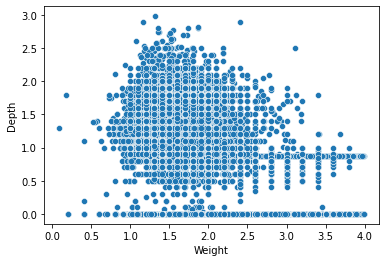

In [51]:
#Plotting a scatter plot of weight vs depth (just checking it out), should be corrected.


sns.scatterplot(data =df , x ='Weight',y='Depth')

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

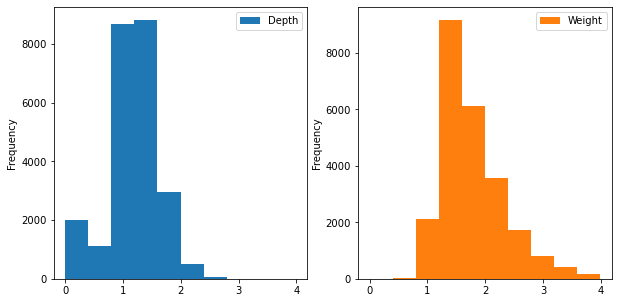

In [52]:
#Plotting a hist plot for Depth (Right skwed)

df[['Depth', 'Weight']].plot(kind='hist', subplots=True, layout=(1,2), figsize=(10,5))

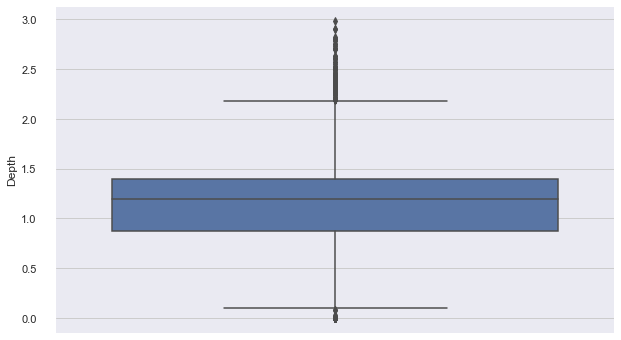

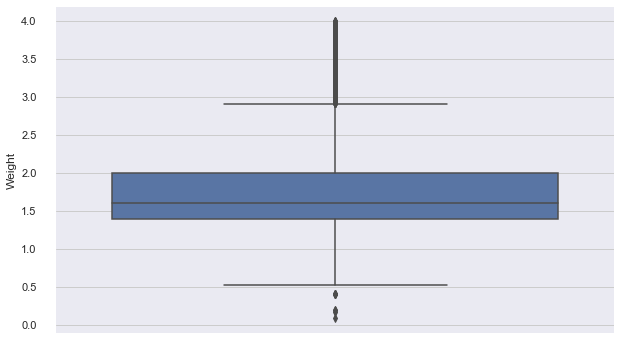

In [53]:
#Box plot to see the see distribution and outliers

for columns in df[['Depth','Weight']]:
    sns.set()
    fig,ax =plt.subplots()
    sns.set(style='ticks')
    sns.boxplot( y =columns, data =df)
    sns.despine(offset =10, trim =True)
    fig.set_size_inches(10,6)

In [54]:
df['Depth'].describe()

count    24135.000000
mean         1.119410
std          0.473362
min          0.000000
25%          0.877337
50%          1.200000
75%          1.400000
max          2.980000
Name: Depth, dtype: float64

In [55]:
df['Weight'].describe()

count    24135.000000
mean         1.745536
std          0.532886
min          0.090000
25%          1.390000
50%          1.600000
75%          2.000000
max          3.990000
Name: Weight, dtype: float64

In [56]:
#LOL, i knew , weight and dept are not correlated at all, theey have no effect
df['Depth'].corr(df['Weight'])

-0.39730163686519154

<AxesSubplot:ylabel='Frequency'>

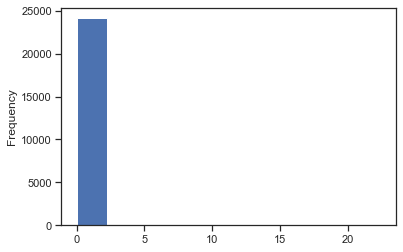

In [57]:
df['Au_ppm'].plot(kind = 'hist')  #Right skewed

In [58]:
df['Au_ppm'].describe()

count    24135.000000
mean         0.010099
std          0.177477
min          0.001000
25%          0.005000
50%          0.005000
75%          0.005000
max         22.400000
Name: Au_ppm, dtype: float64

<AxesSubplot:ylabel='Au_ppm'>

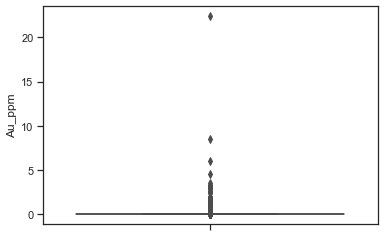

In [59]:
sns.boxplot(data =df, y = 'Au_ppm')  #we can see that AU with 20g/ton

In [60]:
df['Au_ppm'].min(), df['Au_ppm'].max()

(0.001, 22.4)

In [61]:
df.head()  #LOL, i keep checking the head fof the dataset

Sample_Type Project Sampled_Date Sample_Id     X_UTM     Y_UTM  Z_UTM  \
0       Auger    East   2020-01-09   SAS0025  701894.0  831529.0  350.0   
1       Auger    East   2020-01-09   SAS0026  701921.0  831531.0  355.0   
2       Auger    East   2020-01-09   SAS0027  701945.0  831528.0  358.0   
3       Auger    East   2020-01-09   SAS0028  701971.0  831531.0  358.0   
4       Auger    East   2020-01-09   SAS0029  701995.0  831532.0  358.0   

   Depth Tenement  Lab_Turnaround  Weight  Au_ppm  Month  Year  longitude  \
0   0.60    TN066            24.0    1.90   0.033      1  2020  10.829699   
1   0.60    TN066            24.0    1.84   0.102      1  2020  10.829943   
2   0.60    TN066            24.0    1.26   0.003      1  2020  10.830161   
3   0.85    TN066            24.0    1.11   0.003      1  2020  10.830396   
4   0.70    TN066            24.0    0.99   0.003      1  2020  10.830614   

   latitude  
0  7.518854  
1  7.518871  
2  7.518843  
3  7.518870  
4  7.518878

In [62]:
# I want to group the Au values, so i'm going to define the category ranges
categories = {
    'low': (0.001, 0.1),
    'medium': (0.1, 1),
    'good': (1, 10),
    'high': (10, 20),
    'v.high': (20, float('inf'))
}

# Create a new column 'Au_category' with the created categories
df['Au_category'] = pd.cut(df['Au_ppm'], bins=[categories[cat][0] for cat in categories.keys()] + [float('inf')],
                           labels=categories.keys())


df

Sample_Type Project Sampled_Date Sample_Id     X_UTM     Y_UTM  Z_UTM  \
0           Auger    East   2020-01-09   SAS0025  701894.0  831529.0  350.0   
1           Auger    East   2020-01-09   SAS0026  701921.0  831531.0  355.0   
2           Auger    East   2020-01-09   SAS0027  701945.0  831528.0  358.0   
3           Auger    East   2020-01-09   SAS0028  701971.0  831531.0  358.0   
4           Auger    East   2020-01-09   SAS0029  701995.0  831532.0  358.0   
...           ...     ...          ...       ...       ...       ...    ...   
24374        Rock   North   2021-10-21    RK0503  719700.0  891498.0  588.0   
24376        Rock   North   2021-11-26    RK0505  660582.0  991253.0  302.0   
24378        Rock   North   2021-11-26    RK0507  660531.0  991395.0  313.0   
24382        Rock   North   2021-11-26    RK0511  660569.0  991184.0  297.0   
24385        Rock   North   2021-11-27    RK0514  728459.0  885981.0  595.0   

       Depth Tenement  Lab_Turnaround  Weight  Au_ppm  Month  Year  longitude  \
0       0.60    TN066            24.0    1.90   0.033      1  2020  10.829699   
1       0.60    TN066            24.0    1.84   0.102      1  2020  10.829943   
2       0.60    TN066            24.0    1.26   0.003      1  2020  10.830161   
3       0.85    TN066            24.0    1.11   0.003      1  2020  10.830396   
4       0.70    TN066            24.0    0.99   0.003      1  2020  10.830614   
...      ...      ...             ...     ...     ...    ...   ...        ...   
24374   0.00    TN356             NaN    3.10   0.010     10  2021  10.993567   
24376   0.00    TN429             NaN    3.50   1.870     11  2021  10.460685   
24378   0.00    TN429             NaN    3.80   1.660     11  2021  10.460227   
24382   0.00    TN429             NaN    3.40   0.010     11  2021  10.460565   
24385   0.00    TN356             NaN    2.20   0.010     11  2021  11.072759   

       latitude Au_category  
0      7.518854         low  
1      7.518871      medium  
2      7.518843         low  
3      7.518870         low  
4      7.518878         low  
...         ...         ...  
24374  8.060280         low  
24376  8.964560        good  
24378  8.965845        good  
24382  8.963936         low  
24385  8.010015         low  

[24135 rows x 17 columns]

In [63]:
df

Sample_Type Project Sampled_Date Sample_Id     X_UTM     Y_UTM  Z_UTM  \
0           Auger    East   2020-01-09   SAS0025  701894.0  831529.0  350.0   
1           Auger    East   2020-01-09   SAS0026  701921.0  831531.0  355.0   
2           Auger    East   2020-01-09   SAS0027  701945.0  831528.0  358.0   
3           Auger    East   2020-01-09   SAS0028  701971.0  831531.0  358.0   
4           Auger    East   2020-01-09   SAS0029  701995.0  831532.0  358.0   
...           ...     ...          ...       ...       ...       ...    ...   
24374        Rock   North   2021-10-21    RK0503  719700.0  891498.0  588.0   
24376        Rock   North   2021-11-26    RK0505  660582.0  991253.0  302.0   
24378        Rock   North   2021-11-26    RK0507  660531.0  991395.0  313.0   
24382        Rock   North   2021-11-26    RK0511  660569.0  991184.0  297.0   
24385        Rock   North   2021-11-27    RK0514  728459.0  885981.0  595.0   

       Depth Tenement  Lab_Turnaround  Weight  Au_ppm  Month  Year  longitude  \
0       0.60    TN066            24.0    1.90   0.033      1  2020  10.829699   
1       0.60    TN066            24.0    1.84   0.102      1  2020  10.829943   
2       0.60    TN066            24.0    1.26   0.003      1  2020  10.830161   
3       0.85    TN066            24.0    1.11   0.003      1  2020  10.830396   
4       0.70    TN066            24.0    0.99   0.003      1  2020  10.830614   
...      ...      ...             ...     ...     ...    ...   ...        ...   
24374   0.00    TN356             NaN    3.10   0.010     10  2021  10.993567   
24376   0.00    TN429             NaN    3.50   1.870     11  2021  10.460685   
24378   0.00    TN429             NaN    3.80   1.660     11  2021  10.460227   
24382   0.00    TN429             NaN    3.40   0.010     11  2021  10.460565   
24385   0.00    TN356             NaN    2.20   0.010     11  2021  11.072759   

       latitude Au_category  
0      7.518854         low  
1      7.518871      medium  
2      7.518843         low  
3      7.518870         low  
4      7.518878         low  
...         ...         ...  
24374  8.060280         low  
24376  8.964560        good  
24378  8.965845        good  
24382  8.963936         low  
24385  8.010015         low  

[24135 rows x 17 columns]

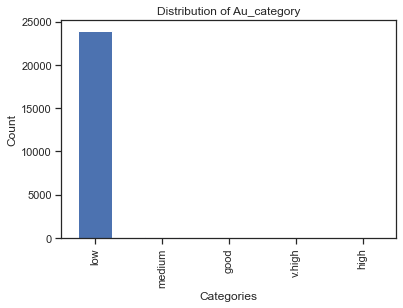

In [66]:
#Showing the distribution of Au_category 

df['Au_category'].value_counts().plot(kind ='bar') 
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Au_category');


#The lowest categories still have it 

In [76]:
Au_cat_proj = df.groupby('Project')['Au_category'].value_counts().unstack()#.plot(kind ='bar')


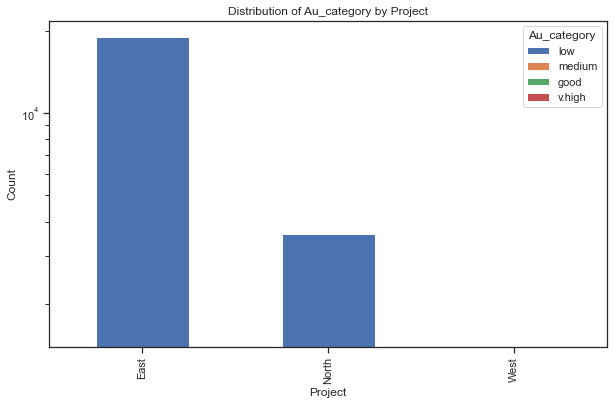

In [80]:

#Tried to figure out , how i can adjust the scale because of the high difference in the values
#Tried using the lograithimc scale

Au_cat_proj = df.groupby('Project')['Au_category'].value_counts().unstack()

# Create the stacked bar plot 
ax = Au_cat_proj.plot(kind='bar', stacked=True, figsize=(10, 6))


ax.set_xlabel('Project')
ax.set_ylabel('Count')
ax.set_title('Distribution of Au_category by Project')

#adjust  using log scale
ax.set_yscale('log')

plt.show()

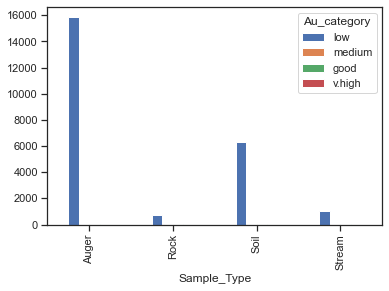

In [68]:
Au_cat_sample_type = df.groupby('Sample_Type')['Au_category'].value_counts().unstack().plot(kind ='bar')

In [81]:
Au_cat_ten_proj = df.groupby(['Project','Tenement'])['Au_category'].value_counts().unstack()
Au_cat_ten_proj

Au_category          low  medium  good  v.high
Project Tenement                              
East    TN066     9362.0    28.0  11.0     1.0
        TN977     7623.0    15.0   9.0     NaN
        TN978     1963.0    12.0   2.0     NaN
North   TN229       10.0     3.0   NaN     NaN
        TN355      181.0     3.0   1.0     NaN
        TN356      866.0     5.0   2.0     NaN
        TN357     1399.0     NaN   NaN     NaN
        TN358     1133.0     NaN   NaN     NaN
        TN429        5.0     4.0   3.0     NaN
West    TN237      643.0     NaN   1.0     NaN
        TN573      420.0     3.0   NaN     NaN
        TN776       16.0     NaN   NaN     NaN
        TN801      209.0     4.0   1.0     NaN
        TN802       80.0     NaN   NaN     NaN
        TN995       23.0     NaN   NaN     NaN

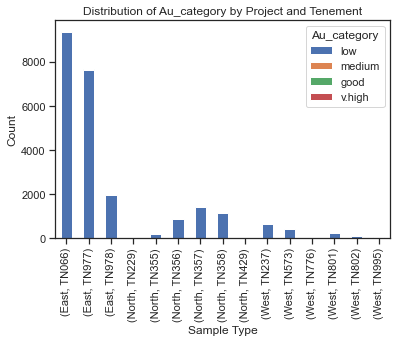

In [82]:
# Plot the stacked bar chart
Au_cat_ten_proj.plot(kind='bar', stacked=True)


plt.xlabel('Sample Type')
plt.ylabel('Count')
plt.title('Distribution of Au_category by Project and Tenement')


plt.legend(title='Au_category')
plt.show()

In [83]:
Au_cat_samptyp =df.groupby('Sample_Type')['Au_category'].value_counts().unstack()
Au_cat_samptyp

Au_category      low  medium  good  v.high
Sample_Type                               
Auger        15837.0    20.0   4.0     NaN
Rock           767.0    17.0   9.0     1.0
Soil          6291.0     9.0   8.0     NaN
Stream        1038.0    31.0   9.0     NaN

<Figure size 720x432 with 0 Axes>

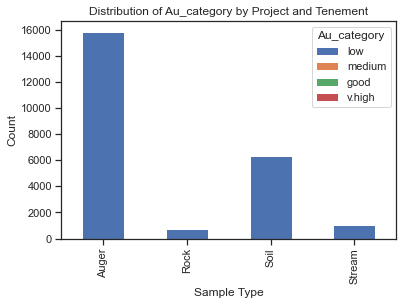

In [84]:

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

# Create the bar plot
Au_cat_samptyp.plot(kind='bar', stacked=True)

# Set the labels and title of the plot
plt.xlabel('Sample Type')
plt.ylabel('Count')
plt.title('Distribution of Au_category by Project and Tenement')

# Display the plot
plt.legend(title='Au_category')
plt.show()

In [91]:
#Next up is to analyze the time series, to know the most important monthe and year, work was done in each project 

In [85]:
df.head()

Sample_Type Project Sampled_Date Sample_Id     X_UTM     Y_UTM  Z_UTM  \
0       Auger    East   2020-01-09   SAS0025  701894.0  831529.0  350.0   
1       Auger    East   2020-01-09   SAS0026  701921.0  831531.0  355.0   
2       Auger    East   2020-01-09   SAS0027  701945.0  831528.0  358.0   
3       Auger    East   2020-01-09   SAS0028  701971.0  831531.0  358.0   
4       Auger    East   2020-01-09   SAS0029  701995.0  831532.0  358.0   

   Depth Tenement  Lab_Turnaround  Weight  Au_ppm  Month  Year  longitude  \
0   0.60    TN066            24.0    1.90   0.033      1  2020  10.829699   
1   0.60    TN066            24.0    1.84   0.102      1  2020  10.829943   
2   0.60    TN066            24.0    1.26   0.003      1  2020  10.830161   
3   0.85    TN066            24.0    1.11   0.003      1  2020  10.830396   
4   0.70    TN066            24.0    0.99   0.003      1  2020  10.830614   

   latitude Au_category  
0  7.518854         low  
1  7.518871      medium  
2  7.518843         low  
3  7.518870         low  
4  7.518878         low

In [86]:
month_proj =df.groupby('Project')['Month'].value_counts().unstack()
month_proj

Month        1       2       3       4      5      6      7       8       9   \
Project                                                                        
East     2591.0  1052.0  1381.0  1245.0  957.0  841.0  841.0  2390.0  2665.0   
North       NaN     1.0    12.0   383.0  211.0  538.0  988.0  1265.0   204.0   
West        NaN     NaN     NaN   239.0  135.0  235.0  652.0    83.0    76.0   

Month        10      11      12  
Project                          
East     1386.0  1715.0  2013.0  
North      12.0     6.0     NaN  
West        7.0    11.0     NaN

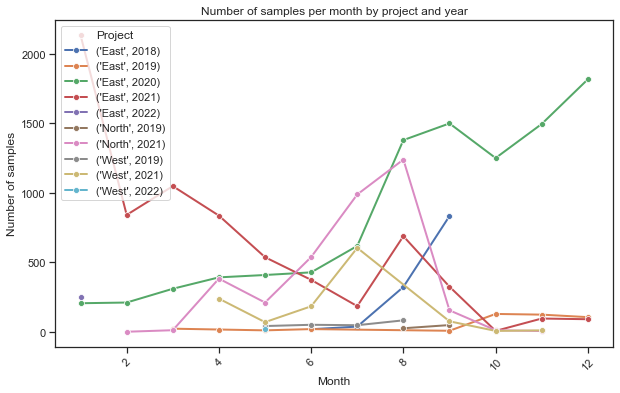

In [92]:
#Checking the relationship between the samples per year and month and project 

month_proj = df.groupby(['Project', 'Year'])['Month'].value_counts().unstack()

plt.figure(figsize=(10, 6))

# We have to iterate over each project to get the years for each 
for project in month_proj.index:
    sns.lineplot(data=month_proj.loc[project].T, label=project, marker='o', linewidth=2)

plt.xlabel('Month')
plt.ylabel('Number of samples')
plt.title('Number of samples per month by project and year')
plt.legend(title='Project')

# Adjusting the x -axis 
plt.xticks(rotation=45)

plt.show()